# **DATA MODELING - REGRESSION - NOTEBOOK**

## Objectives

* Fit and evaluate a regression model to predict amount levels for a prospect that will likely suffer a damage

## Inputs

* outputs/datasets/collection/dataPP5_cleaned_10k.csv

## Outputs

* Train set (features and target)
* Test set (features and target)
* ML pipeline to predict amount
* labels map
* Feature Importance Plot

## Comments

* steps to prepare the data for the model, then the model
* pipeline should identify a training outcome and a prediction outcome, through 
   * predictor estimator .fit() & .predict() 
   * transformer estimator .fit() & .transform()


---

# Change working directory

* access the current directory
* make the parent of the current directory the new current directory

In [1]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspace/PP5_My_project'

---

# Import Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from sklearn.pipeline import Pipeline

---

# Load Data

In [7]:
df = pd.read_csv('outputs/datasets/collection/dataPP5_cleaned_10k.csv').query("Damage == 1").drop(labels=['DATE OCC', 'LAT', 'LON', 'Damage'], axis=1)
print(df.shape)
df.head(3)

(5781, 16)


,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount
1,1130,14,Pacific,330,BURGLARY FROM VEHICLE,32,F,W,101.0,STREET,999.0,NO WEAPON,2400 CLARK AV,NO CROSS STREET,1,2000.0
2,2130,1,Central,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",34,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",999.0,NO WEAPON,1200 S FIGUEROA ST,NO CROSS STREET,7,900.0
3,1700,21,Topanga,510,VEHICLE - STOLEN,0,X,X,108.0,PARKING LOT,999.0,NO WEAPON,7000 ALABAMA AV,NO CROSS STREET,3,20000.0


---

## Feature Scaling and Feature Selection

### Feature Scaling 

* to give the data the properties of a standard normal distribution with a mean of zero and a standard deviation of one
* the variable distribution will be slightly different, but we create better condition for the algorithm to learn the patterns and relationships and generalize on unseen data

In [8]:
# Using StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create Pipeline
pipeline = Pipeline([
    ("ScaleMeGood", StandardScaler())
])

In [15]:
# Loading TrainSetRegressionCleaned.csv
dftrainreg = pd.read_csv('outputs/datasets/cleaned/TrainSetRegressionCleaned.csv').drop(labels=['LAT', 'LON'], axis=1)
print(dftrainreg.shape)
dftrainreg.head(3)

(8000, 20)


,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount,Damage,Year_OCC,Month_OCC,Day_OCC
0,1000,15,8,626,53,21,0,15,101.0,164,400.0,46,5410,574,2,0.0,0,2021,6,1
1,1910,1,1,440,85,33,1,6,102.0,156,999.0,31,2544,184,7,950.0,1,2020,3,8
2,2320,3,15,230,2,26,1,15,101.0,164,400.0,46,6830,335,7,0.0,0,2022,3,6


In [14]:
# Loading TestSetRegressionCleaned.csv
dftestreg = pd.read_csv('outputs/datasets/cleaned/TestSetRegressionCleaned.csv').drop(labels=['LAT', 'LON'], axis=1)
print(dftestreg.shape)
dftestreg.head(10)

(2000, 20)


,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,LOCATION,Cross Street,Day of Week,Amount,Damage,Year_OCC,Month_OCC,Day_OCC
0,2300,18,14,510,95,0,2,15,101.0,164,999.0,31,6654,184,7,20000.0,1,2020,2,16
1,1900,5,4,510,95,0,2,15,101.0,164,999.0,31,78,574,3,20000.0,1,2022,10,19
2,1820,1,1,210,70,27,0,14,104.0,42,400.0,46,975,574,3,10000.0,1,2021,4,14
3,745,14,12,437,69,0,2,15,101.0,164,400.0,46,7062,747,7,0.0,0,2021,3,14
4,1045,2,13,220,3,0,2,15,406.0,132,200.0,26,2006,574,7,2000.0,1,2021,1,17
5,1510,5,4,850,51,36,0,6,101.0,164,999.0,31,4002,574,2,0.0,0,2022,2,1
6,130,18,14,510,95,0,2,15,101.0,164,999.0,31,863,512,7,20000.0,1,2020,5,10
7,1400,7,20,442,74,21,2,15,203.0,128,999.0,31,27,574,7,950.0,1,2022,11,13
8,100,18,14,740,92,26,0,1,501.0,157,999.0,31,6268,574,5,900.0,1,2023,2,17
9,1,20,11,649,40,0,2,15,502.0,118,999.0,31,1747,574,2,0.0,0,2020,2,18


In [16]:
X_train = dftrainreg[['TIME OCC', 'AREA', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'LOCATION', 'Cross Street', 'Day of Week']]
y_train = dftrainreg[['Amount']]
print(X_train.shape, y_train.shape)

(8000, 11) (8000, 1)


In [22]:
X_test = dftestreg[['TIME OCC', 'AREA', 'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'LOCATION', 'Cross Street', 'Day of Week']]
y_test = dftestreg[['Amount']]
print(X_test.shape, y_test.shape)

(2000, 11) (2000, 1)


In [24]:
# Applying pipelines to ML and fit the pipeline to train set and based on this learning, transform the data on train and test set
pipeline.fit(X_train)
X_train_scaled = pipeline.transform(X_train)
X_test_scaled = pipeline.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(8000, 11) (2000, 11)


In [25]:
# Testing the type, should be a numpy array
type(X_train_scaled)

numpy.ndarray

In [27]:
# Converting it to a DataFrame
X_train_scaled = pd.DataFrame(data= X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data= X_test_scaled, columns=X_test.columns)
print(type(X_train_scaled), type(X_test_scaled))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


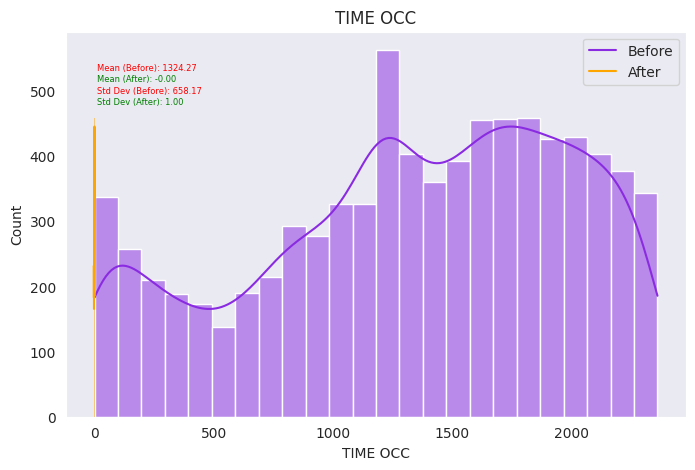

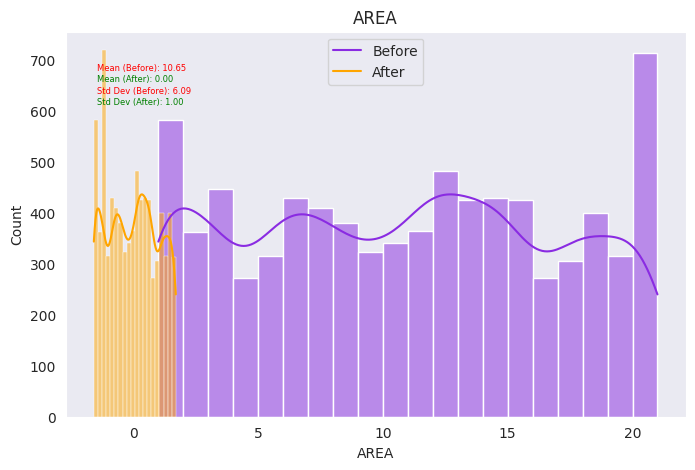

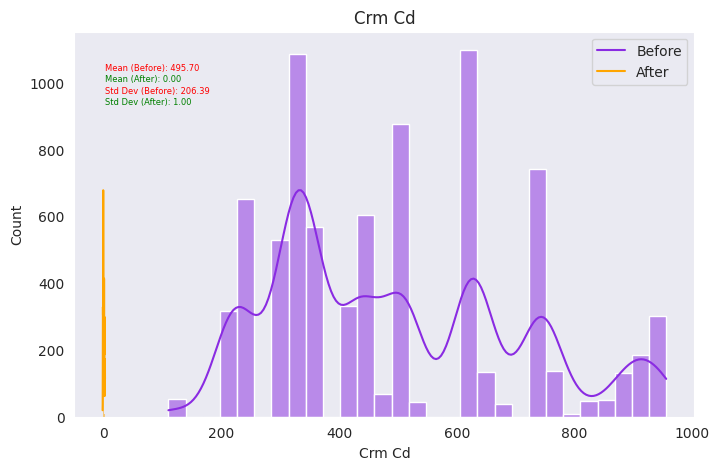

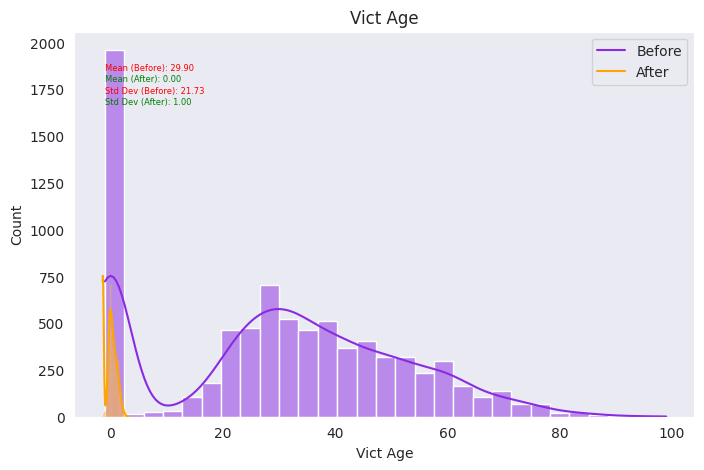

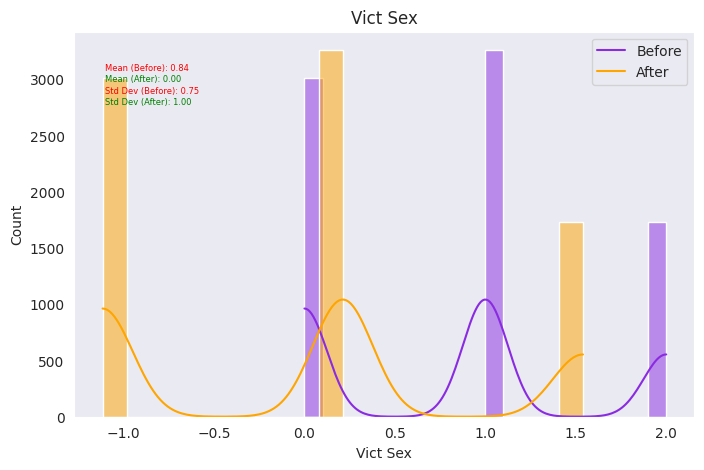

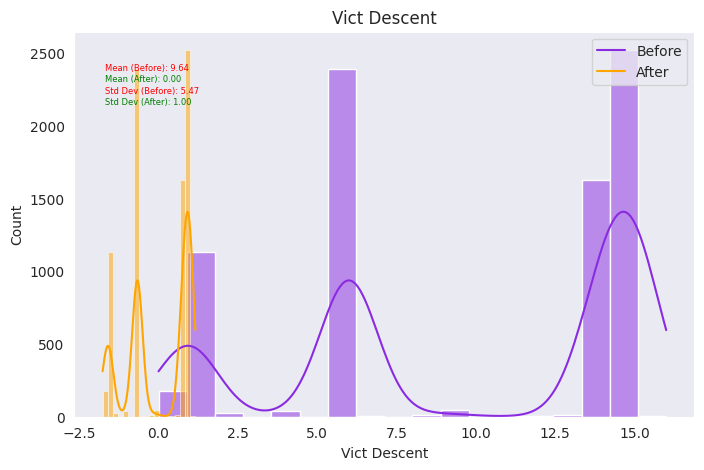

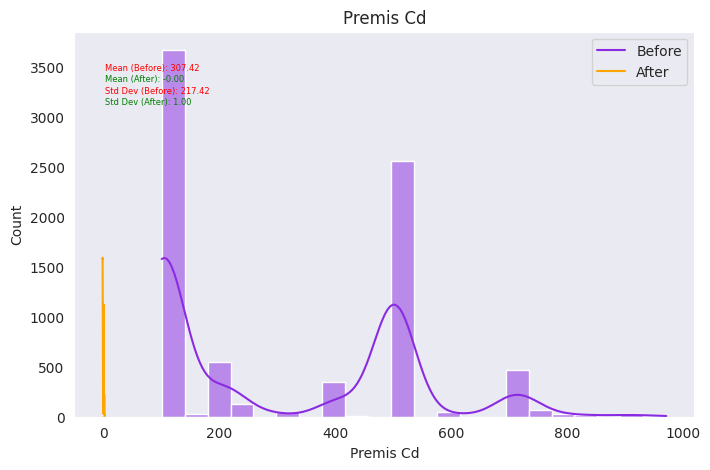

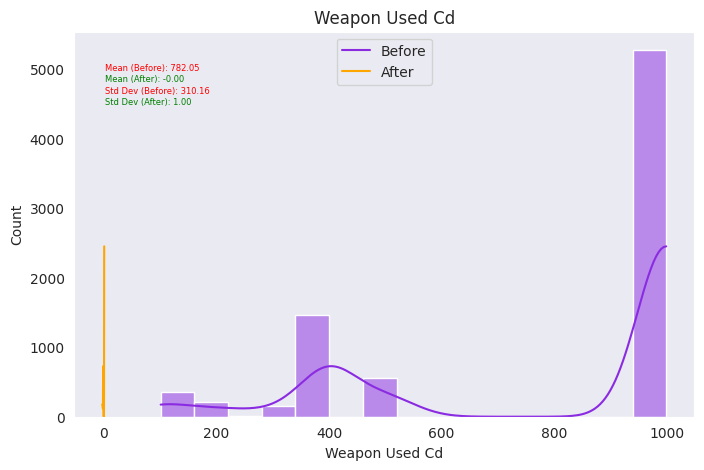

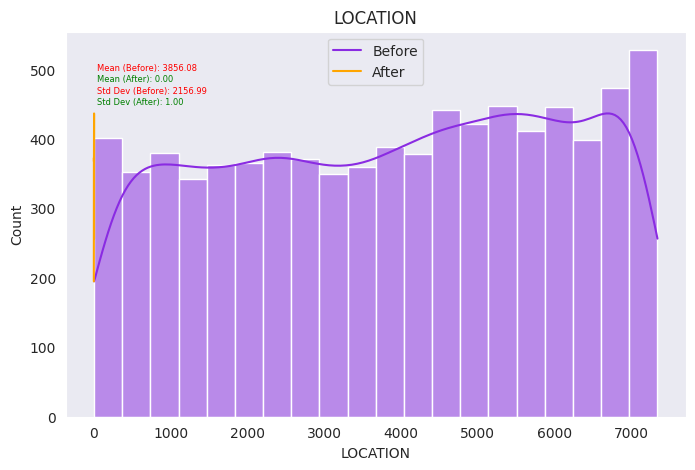

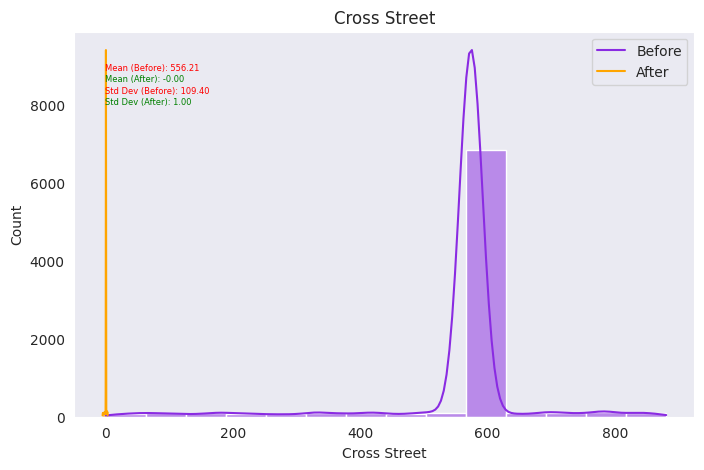

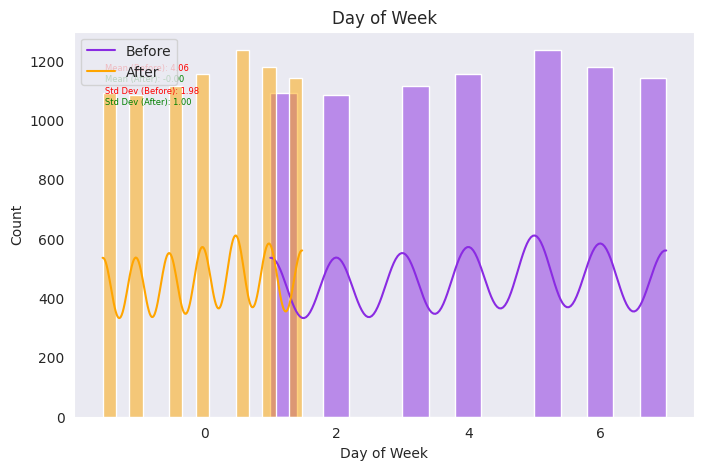

In [38]:
# Difference before and after StandardScaler()
for col in X_train.columns:

    # Plot the histograms
    fig, axes = plt.subplots(figsize=(8,5))
    sns.histplot(data=X_train, x=col, kde=True, color='#8A2BE2', ax=axes)
    sns.histplot(data=X_train_scaled, x=col, kde=True, color='#FFA500', ax=axes)
    
    # Set plot title and legend
    axes.set_title(f"{col}")
    axes.legend(labels=['Before', 'After'])
    
    # Calculate and Display the mean on the plot
    mean_before = X_train[col].mean()
    mean_after = X_train_scaled[col].mean()
    axes.text(0.05, 0.9, f"Mean (Before): {mean_before:.2f}", transform=axes.transAxes, fontsize=6, color='red')
    axes.text(0.05, 0.87, f"Mean (After): {mean_after:.2f}", transform=axes.transAxes, fontsize=6, color='green')
    
    # Calculate and Display the standard deviation on the plot
    std_before = X_train[col].std()
    std_after = X_train_scaled[col].std()
    axes.text(0.05, 0.84, f"Std Dev (Before): {std_before:.2f}", transform=axes.transAxes, fontsize=6, color='red')
    axes.text(0.05, 0.81, f"Std Dev (After): {std_after:.2f}", transform=axes.transAxes, fontsize=6, color='green')
    
    # Show the plot
    plt.show()
    print("\n\n")

### Feature Selection 

* to obtain a process to select the relevant features for fitting the ML model
    * fewer and more relevant features = easier to interpret
    * no overfitting (normally)
    * time to train and feature space are reduced

* Using Embedded method (could also use Filter Method or Wrapper Method)
    * performs feature selection during training, finds the feature subset for the algorithm that is being trained
    * derives feature importance from the trained ML model, removing non-relevant features using the derived feature importance


In [39]:
# Using SelectFromModel()
from sklearn.feature_selection import SelectFromModel

# Using Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier

# Create Pipeline
pipeline = Pipeline([
    ("ScaleMeGood", StandardScaler()),
    ("SelectMeGood", SelectFromModel(DecisionTreeClassifier(random_state=77))),
    ("ModelMeGood", DecisionTreeClassifier(random_state=77))
])

pipeline

Pipeline(steps=[('ScaleMeGood', StandardScaler()),
                ('SelectMeGood',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGood', DecisionTreeClassifier(random_state=77))])

In [41]:
# Fitting the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ScaleMeGood', StandardScaler()),
                ('SelectMeGood',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGood', DecisionTreeClassifier(random_state=77))])

In [44]:
# Access which features were selected
X_train.columns[pipeline['SelectMeGood'].get_support()]

Index(['Crm Cd', 'Weapon Used Cd'], dtype='object')

---

## Predictions

In [58]:
# Using .predict() and parse the test set features (X_test)
ModelMeVeryGood = DecisionTreeClassifier()
ModelMeVeryGood.fit(X_train_scaled, y_train)
ModelMeVeryGood.predict(X_test_scaled)

array([20000., 20000., 10000., ..., 10000.,   950., 10000.])

In [59]:
# Using .predict_proba() to predict probability (between 0 and 1) for each class for a given observation
ModelMeVeryGood.predict_proba(X_test_scaled)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

---

# Push files to the repo

* Train Set
* Test Set
* Modeling pipeline
* label map
* features importance plot

In [53]:
import joblib
import os

# Define the version for the saved file
version = 'v1'

# Create the file path where the model will be saved
file_path = f'outputs/ml_pipeline/predict_amount/{version}'

# Try to create the directory if it does not exist
try:
  os.makedirs(name=file_path)
except Exception as e:
    # If the directory already exists or there's another issue, print the exception
  print(e)

In [54]:
# to save the model See "Save your model" at the End of Scikit-Learn Unit 2
joblib.dump(value=pipeline, filename=f"{file_path}/v1_pipeline_reg_amount.pkl")

['outputs/ml_pipeline/predict_amount/v1/v1_pipeline_reg_amount.pkl']

In [55]:
# to load it 
loaded_model = joblib.load(filename='outputs/ml_pipeline/predict_amount/v1/v1_pipeline_reg_amount.pkl')
loaded_model

Pipeline(steps=[('ScaleMeGood', StandardScaler()),
                ('SelectMeGood',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=77))),
                ('ModelMeGood', DecisionTreeClassifier(random_state=77))])


then Scikit-Learn Unit 3: 